<a href="https://colab.research.google.com/github/ericbonelli/Cientista-de-Dados_EBAC/blob/main/Profissa%CC%83o_Cientista_de_Dados_M30_Pratique_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Métodos hierárquicos de agrupamento - Tarefa

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

import scipy.cluster.hierarchy as shc

## 1) Repetindo o que fizemos em aula

Primeiramente vamos repetir o que fizemos em aula com a base de pinguins.

1. Selecione as variáveis quantitativas da base de pinguins
2. Elimine valores faltantes
3. Padronize as variáveis para média zero e desvio padrão 1
4. Faça um agrupamento hierárquico dividindo essa base em 3 grupos
5. Faça o Dendrograma

In [2]:
# Selecione as variáveis quantitativas da base de pinguins e Elimine valores faltantes
peng = sns.load_dataset('penguins')
peng.index.name='id'
peng_num = peng.select_dtypes(include='number').dropna()

In [3]:
# Padronize as variáveis para média zero e desvio padrão 1
padronizador = StandardScaler()
peng_pad = padronizador.fit_transform(peng_num)

In [4]:
# Faça um agrupamento hierárquico dividindo essa base em 3 grupos
clus = AgglomerativeClustering(linkage="complete",
                                 distance_threshold = None,
                                 n_clusters=3)

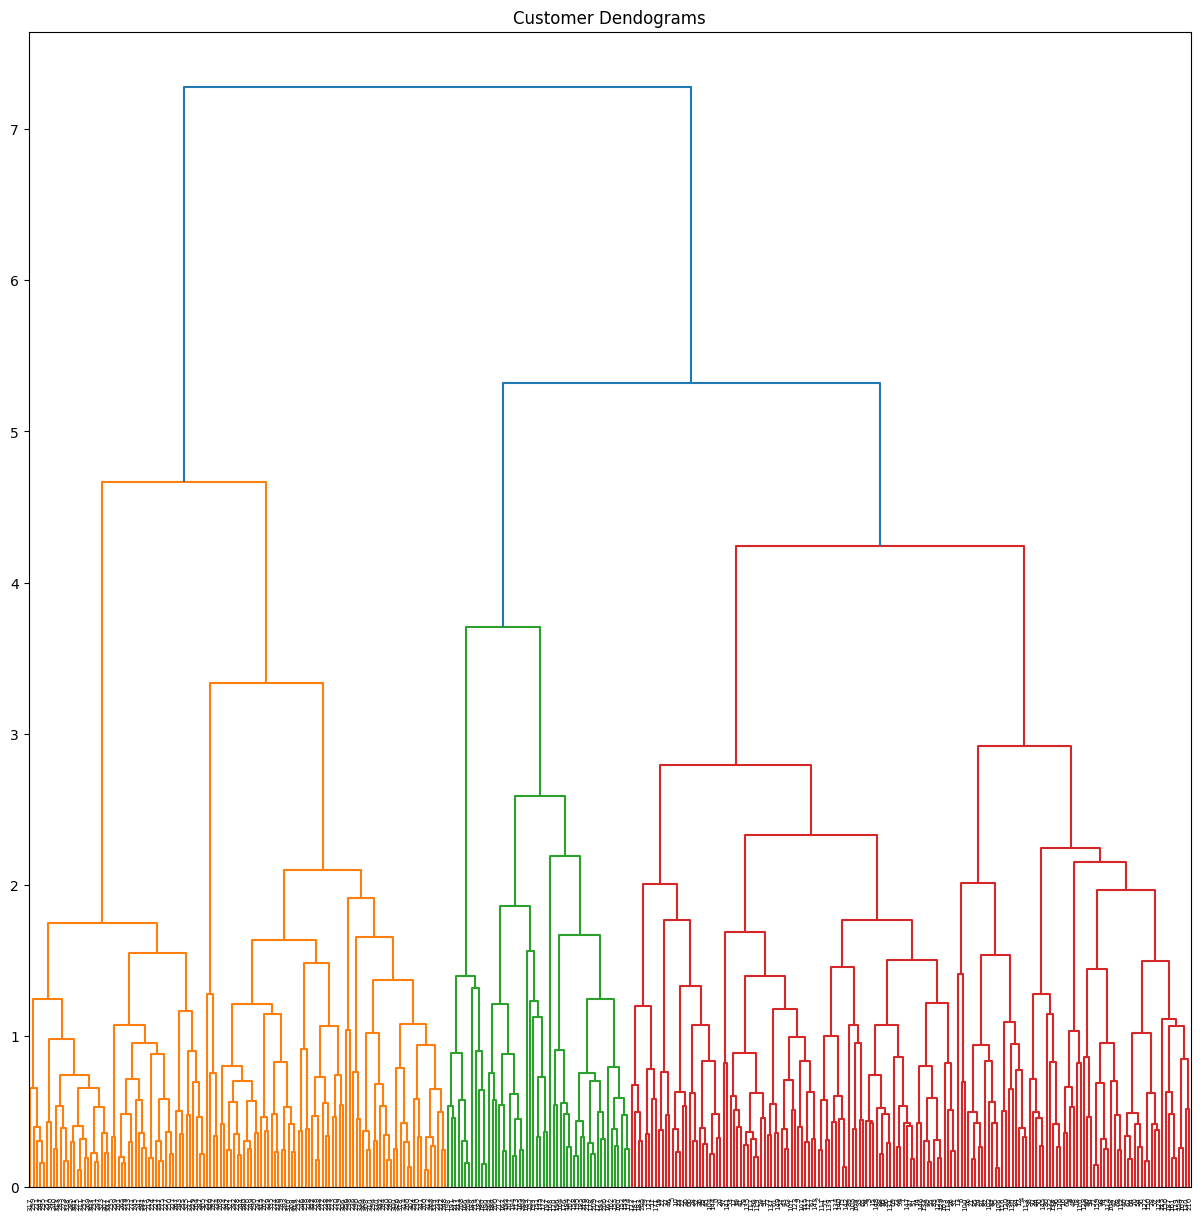

In [6]:
# Faça o Dendrograma
plt.figure(figsize=(15, 15))

plt.title("Customer Dendograms")

dend = shc.dendrogram(shc.linkage(peng_pad, method='complete'))

## 2) Avalie os grupos

Descreva os grupos:

- Quantos pinguins de cada espécie há em cada grupo?
- Descreva as variáveis quantitativas de cada grupo com as técnicas que você preferir.

In [9]:
# Quantos pinguins de cada espécie há em cada grupo?
clus.fit(peng_pad)
peng_num['grupo'] = clus.labels_
peng = peng.merge(peng_num['grupo'], how='left', on='id')
pd.crosstab(peng['species'], peng['grupo'])

grupo,0.0,1.0,2.0
species,,,
Adelie,0,151,0
Chinstrap,0,14,54
Gentoo,123,0,0


In [10]:
# Descreva as variáveis quantitativas de cada grupo com as técnicas que você preferir.
peng_num.groupby('grupo').mean()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
grupo,,,,
0,47.504878,14.982114,217.186992,5076.016260
1,39.283030,18.304242,190.048485,3688.181818
2,49.935185,18.568519,197.055556,3779.629630


## 3) Alterando o agrupamento

O Dendrogarma sugere que podemem haver grupos interessantes se solicitarmos mais que 3 grupos. Se quisermos testar o agrupamento com mais de 3 grupos, quantos grupos o Dendrograma te sugere? (Dica: não faça mais que 6 grupos).

- Faça o agrupamento hierárquico semelhante ao anterior, mas com o número de grupos que você escolheu.
- Analise esses agrupamentos
    - Quantos pinguins de cada espécie há em cada grupo?
    - Quantos pinguins de cada espécie machos e fêmeas há em cada grupo?
- Na sua opinião, o agrupamento capturou algum padrão natural dos dados? Qual?

In [12]:
# Quantos pinguins de cada espécie há em cada grupo?
clus = AgglomerativeClustering(linkage="complete",
                                 distance_threshold = None,
                                 n_clusters=6)

In [14]:
# Quantos pinguins de cada espécie há em cada grupo?
clus.fit(peng_pad)
peng_num['grupo'] = clus.labels_
peng['grupo'] = peng_num['grupo']

pd.crosstab(peng['species'], peng['grupo'])

grupo,0.0,1.0,2.0,3.0,4.0,5.0
species,,,,,,
Adelie,0,91,60,0,0,0
Chinstrap,0,5,9,0,42,12
Gentoo,71,0,0,52,0,0


In [15]:
# Quantos pinguins de cada espécie machos e fêmeas há em cada grupo?
pd.crosstab(peng['species'], [peng['sex'], peng['grupo']])


sex       Female                 Male                
grupo        0.0 1.0 2.0 3.0 4.0  0.0 1.0 2.0 4.0 5.0
species                                              
Adelie         0  69   4   0   0    0  18  55   0   0
Chinstrap      0   5   9   0  20    0   0   0  22  12
Gentoo         9   0   0  49   0   61   0   0   0   0

Na sua opinião, o agrupamento capturou algum padrão natural dos dados? Qual?

Os grupos 1 e 3 as fêmeas são majoritárias, enquanto o grupos 0, 2 e 5 os machos são majoritários. Já o grupo 4 ficou com aproximadamente 50%/50% entre machos e fêmeas.